In [17]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from keras import utils
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, Flatten, Dropout, SimpleRNN 
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [18]:
# Максимальное количество слов 
num_words = 10000
# Максимальная длина обращения
max_len = 9

In [19]:
#Загрузка сета
train = pd.read_table('data/train.tsv', sep='\t', header=None, names=['phrase', 'history', 'binary'])

In [20]:
# Токенезируем текст, делаем словарь
a = train['phrase']
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(a)
sequences = tokenizer.texts_to_sequences(a)

In [21]:
#Печатка словаря, потереть потом
print(tokenizer.word_index)

{'маруся': 1, 'ты': 2, 'я': 3, 'а': 4, 'что': 5, 'не': 6, 'да': 7, 'как': 8, 'ну': 9, 'у': 10, 'это': 11, 'тебя': 12, 'в': 13, 'на': 14, 'и': 15, 'меня': 16, 'нет': 17, 'мне': 18, 'тебе': 19, 'включи': 20, 'с': 21, 'то': 22, 'сколько': 23, 'давай': 24, 'все': 25, 'будет': 26, 'привет': 27, 'так': 28, 'алиса': 29, 'почему': 30, 'вот': 31, 'сейчас': 32, 'скажи': 33, 'есть': 34, 'мы': 35, 'еще': 36, 'знаешь': 37, 'какая': 38, 'марусь': 39, 'она': 40, 'кто': 41, 'спасибо': 42, 'или': 43, 'зовут': 44, 'же': 45, 'когда': 46, 'хорошо': 47, 'по': 48, 'уже': 49, 'погода': 50, 'потому': 51, 'просто': 52, 'знаю': 53, 'где': 54, 'пока': 55, 'очень': 56, 'вы': 57, 'какой': 58, 'если': 59, 'пожалуйста': 60, 'тоже': 61, 'надо': 62, 'там': 63, 'плюс': 64, 'сказала': 65, 'завтра': 66, 'можешь': 67, 'два': 68, 'дела': 69, 'сегодня': 70, 'хочу': 71, 'расскажи': 72, 'ладно': 73, 'ничего': 74, 'вообще': 75, 'он': 76, 'лет': 77, 'за': 78, 'тобой': 79, 'песню': 80, 'ой': 81, 'один': 82, 'три': 83, 'чем': 84,

In [29]:
y_train = train['binary']
x_train = pad_sequences(sequences, maxlen=max_len)

In [30]:
#меняй модели. фигня выходит
model = Sequential() 
model.add(Embedding(num_words, 2, input_length=max_len))
model.add(SimpleRNN(8))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='Adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [32]:
#сохранение весов
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)     

In [33]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=12,
                    validation_split=0.10)
                   # callbacks=[checkpoint_callback_lstm]) #отделяй чтоб не портить веса

Epoch 1/10
2168/2168 [==============================] - 4s 1ms/step - loss: 0.4925 - accuracy: 0.7876 - val_loss: 0.4831 - val_accuracy: 0.7772
Epoch 2/10
2168/2168 [==============================] - 3s 1ms/step - loss: 0.4421 - accuracy: 0.7980 - val_loss: 0.4857 - val_accuracy: 0.7776
Epoch 3/10
2168/2168 [==============================] - 3s 1ms/step - loss: 0.4066 - accuracy: 0.8170 - val_loss: 0.4979 - val_accuracy: 0.7748
Epoch 4/10
2168/2168 [==============================] - 3s 1ms/step - loss: 0.3811 - accuracy: 0.8314 - val_loss: 0.5225 - val_accuracy: 0.7738
Epoch 5/10
2168/2168 [==============================] - 3s 1ms/step - loss: 0.3606 - accuracy: 0.8398 - val_loss: 0.5391 - val_accuracy: 0.7620
Epoch 6/10
2168/2168 [==============================] - 3s 1ms/step - loss: 0.3454 - accuracy: 0.8461 - val_loss: 0.5578 - val_accuracy: 0.7641
Epoch 7/10
2168/2168 [==============================] - 3s 1ms/step - loss: 0.3354 - accuracy: 0.8488 - val_loss: 0.5694 - val_accuracy:

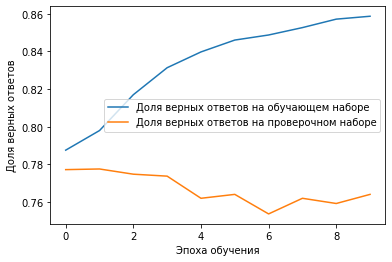

In [34]:
#Граф нейронки. результат такой себе. меняй модели
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [35]:
# Подогнанный под формат файл для анализа. Разбить на CHTO и проче чтоб скормить нейронке
chto = pd.read_table('data/train.tsv', sep='\t', header=None, names=['phrase', 'history', 'binary'])

chto = pd.DataFrame(chto['phrase'], columns=chto.columns)

chto_sequences = tokenizer.texts_to_sequences(chto['phrase'])     #словарь тот же самый для токенов

x_chto = pad_sequences(chto_sequences, maxlen=max_len)

In [36]:
#анализ
model.load_weights('best_model_cnn.h5')
prediction = model.predict(x_chto)

In [37]:
# Вывод предсказания. Отвратный костыль. Не записывай в файл пока не исправишь
for i in prediction:
    if i > 0.5:
        print(1)
    else:
        print(0)

0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
1
1
1
0
1
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
